# 📘 Types of APIs in Python

We'll explore and visualize popular API design types using Python:

1. 🧼 SOAP (Simple Object Access Protocol)
2. 🌐 REST (Representational State Transfer)
3. 🔌 GraphQL
4. 🔄 gRPC
5. 📦 WebSockets

Each cell shows:
- A short explanation
- A visual diagram using the `diagrams` library


SOAP API (XML-based Web Services)

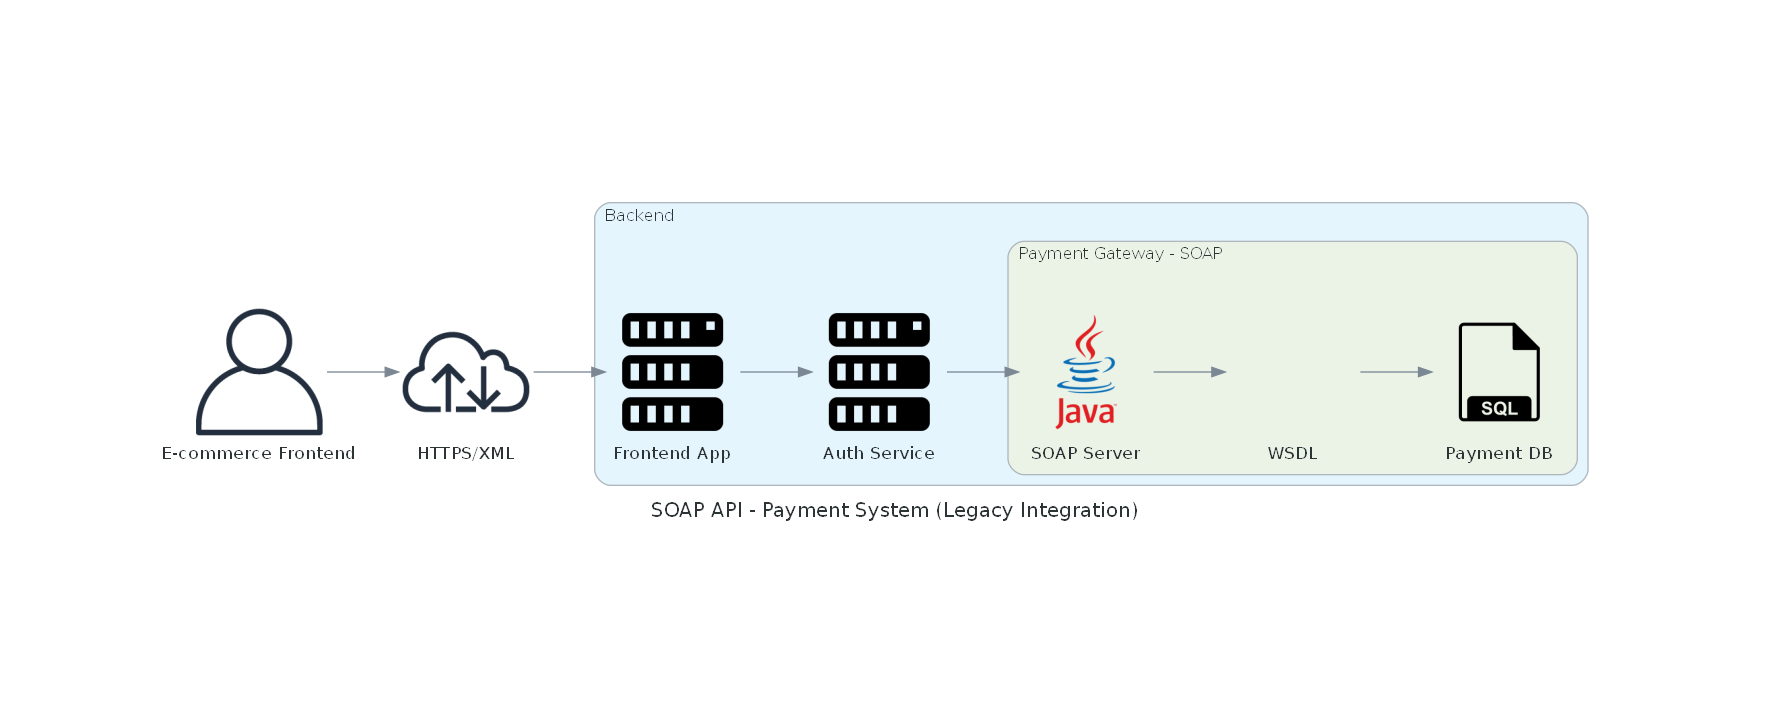

In [6]:
from diagrams import Diagram, Cluster
from diagrams.onprem.client import User
from diagrams.onprem.network import Internet
from diagrams.onprem.compute import Server
from diagrams.programming.language import Java
from diagrams.generic.database import SQL
from diagrams.custom import Custom
from IPython.display import Image

with Diagram("SOAP API - Payment System (Legacy Integration)", show=False, filename="soap_case", outformat="png"):
    client = User("E-commerce Frontend")

    with Cluster("Backend"):
        frontend = Server("Frontend App")
        auth = Server("Auth Service")

        with Cluster("Payment Gateway - SOAP"):
            wsdl = Custom("WSDL", "./icons/wsdl.png")
            soap_handler = Java("SOAP Server")
            legacy_db = SQL("Payment DB")

        frontend >> auth >> soap_handler
        soap_handler >> wsdl >> legacy_db

    client >> Internet("HTTPS/XML") >> frontend

Image("soap_case.png")


 REST API (JSON over HTTP)

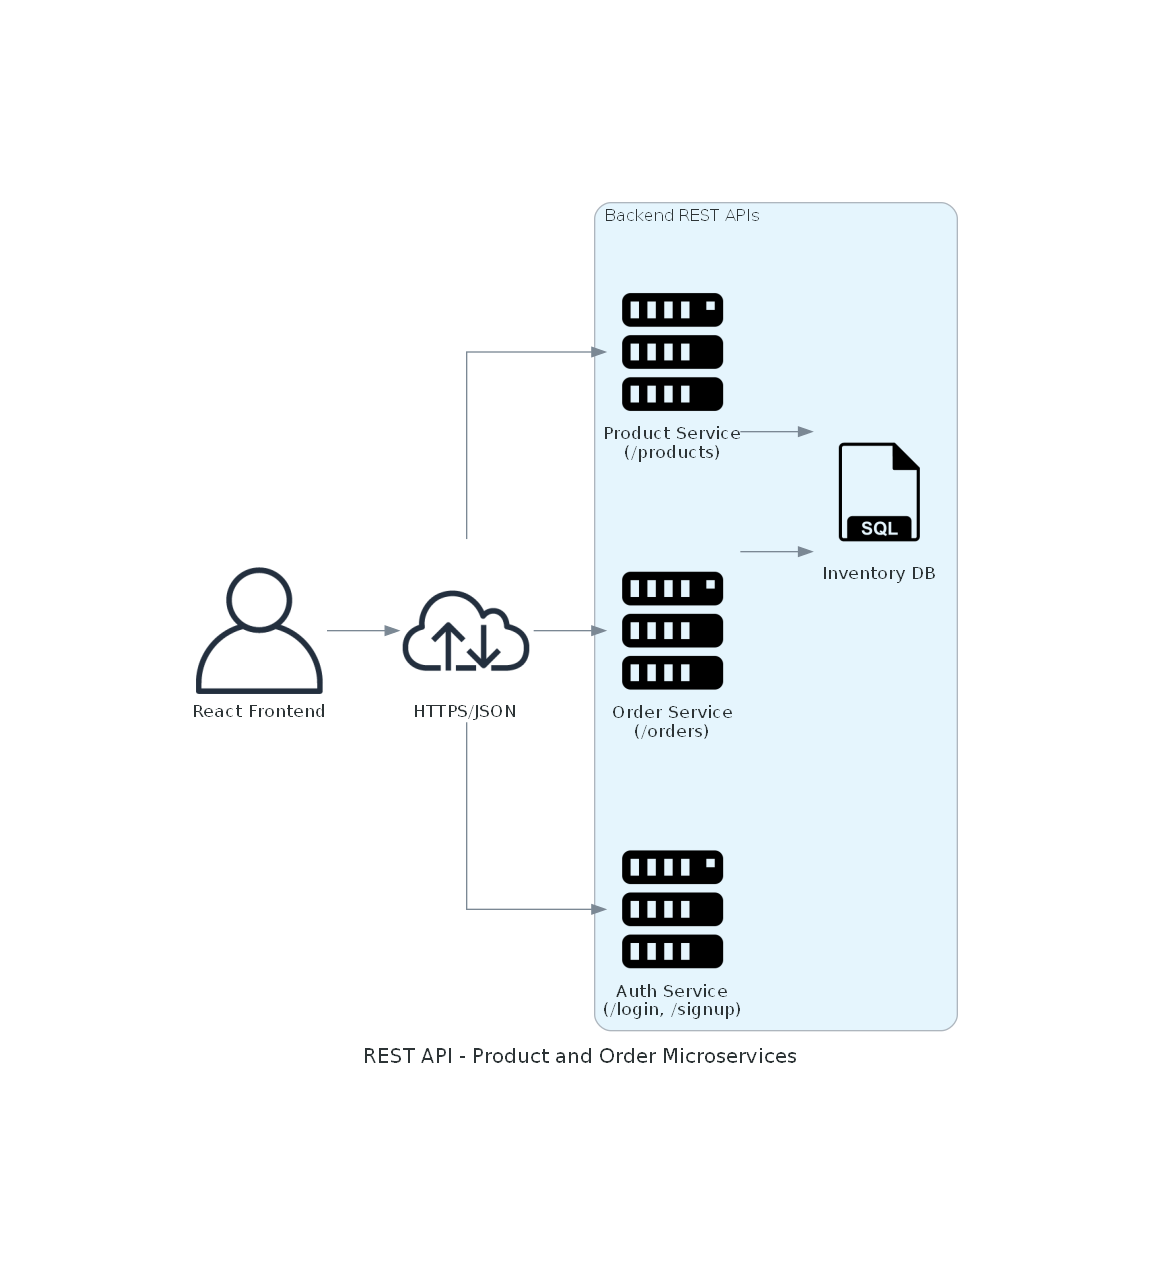

In [7]:
from diagrams import Diagram, Cluster
from diagrams.onprem.client import User
from diagrams.onprem.compute import Server
from diagrams.generic.database import SQL
from diagrams.onprem.network import Internet
from IPython.display import Image

with Diagram("REST API - Product and Order Microservices", show=False, filename="rest_case", outformat="png"):
    client = User("React Frontend")

    with Cluster("Backend REST APIs"):
        auth = Server("Auth Service\n(/login, /signup)")
        product = Server("Product Service\n(/products)")
        order = Server("Order Service\n(/orders)")
        inventory = SQL("Inventory DB")

        product >> inventory
        order >> inventory

    client >> Internet("HTTPS/JSON") >> [auth, product, order]

Image("rest_case.png")


GraphQL API

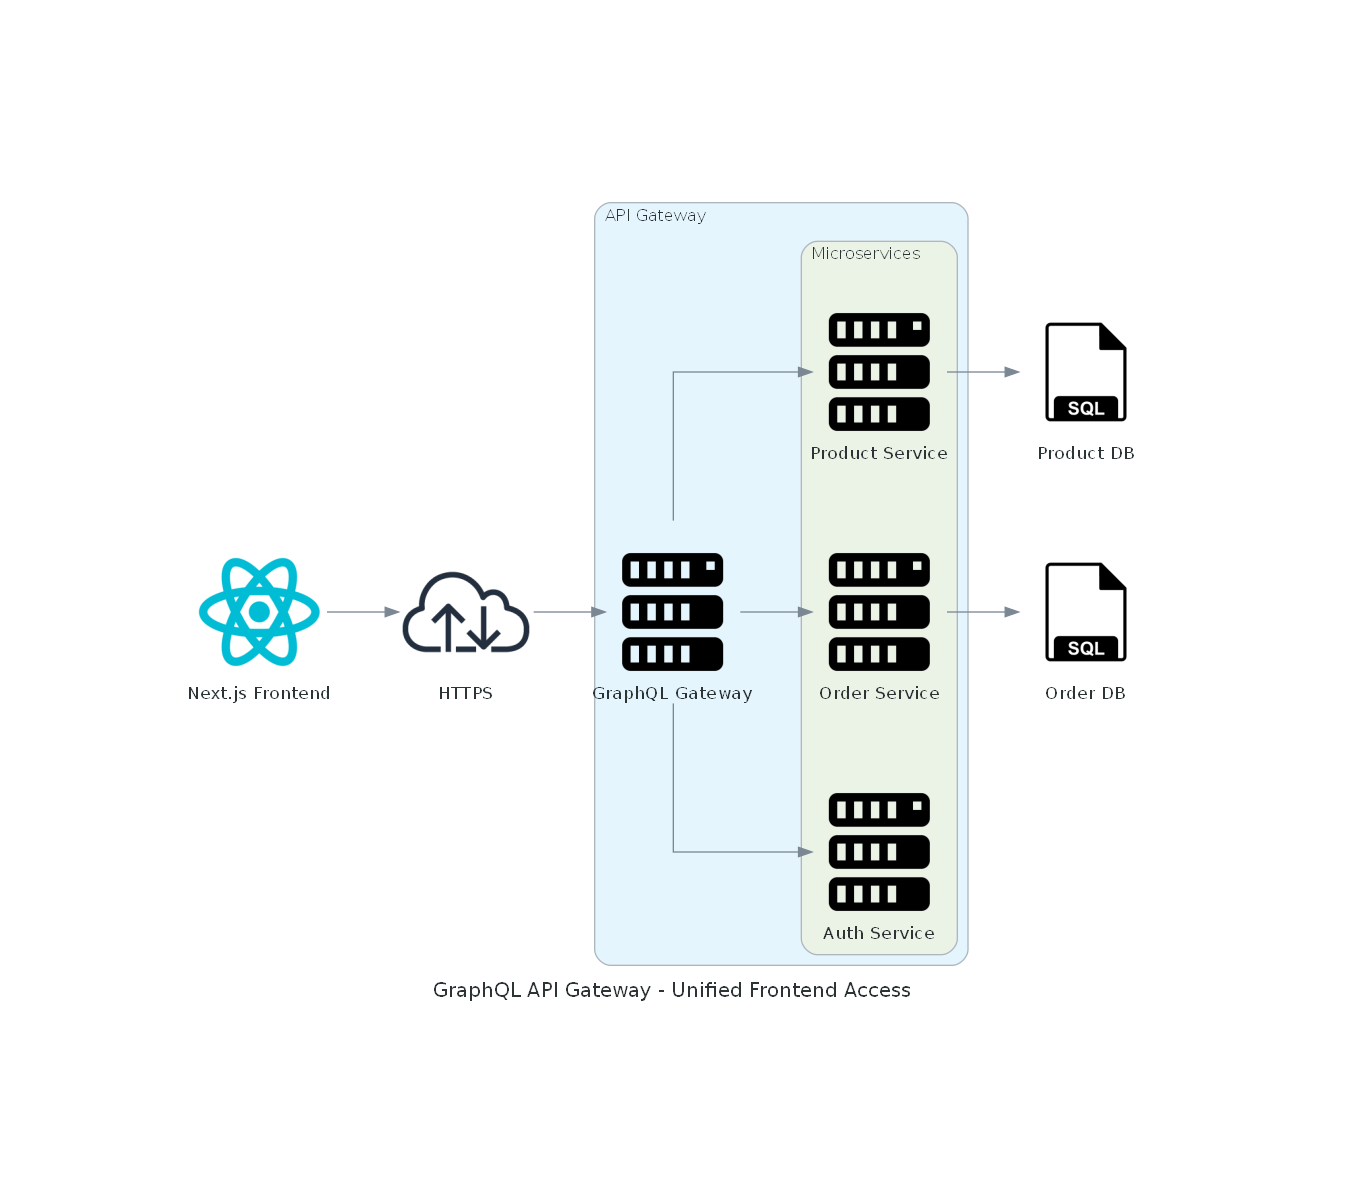

In [8]:
from diagrams import Diagram, Cluster
from diagrams.programming.framework import React
from diagrams.onprem.compute import Server
from diagrams.onprem.network import Internet
from diagrams.generic.database import SQL
from IPython.display import Image

with Diagram("GraphQL API Gateway - Unified Frontend Access", show=False, filename="graphql_case", outformat="png"):
    frontend = React("Next.js Frontend")

    with Cluster("API Gateway"):
        graphql = Server("GraphQL Gateway")

        with Cluster("Microservices"):
            product = Server("Product Service")
            order = Server("Order Service")
            auth = Server("Auth Service")

        graphql >> [product, order, auth]

    product >> SQL("Product DB")
    order >> SQL("Order DB")

    frontend >> Internet("HTTPS") >> graphql

Image("graphql_case.png")


gRPC API (Protocol Buffers over HTTP/2)

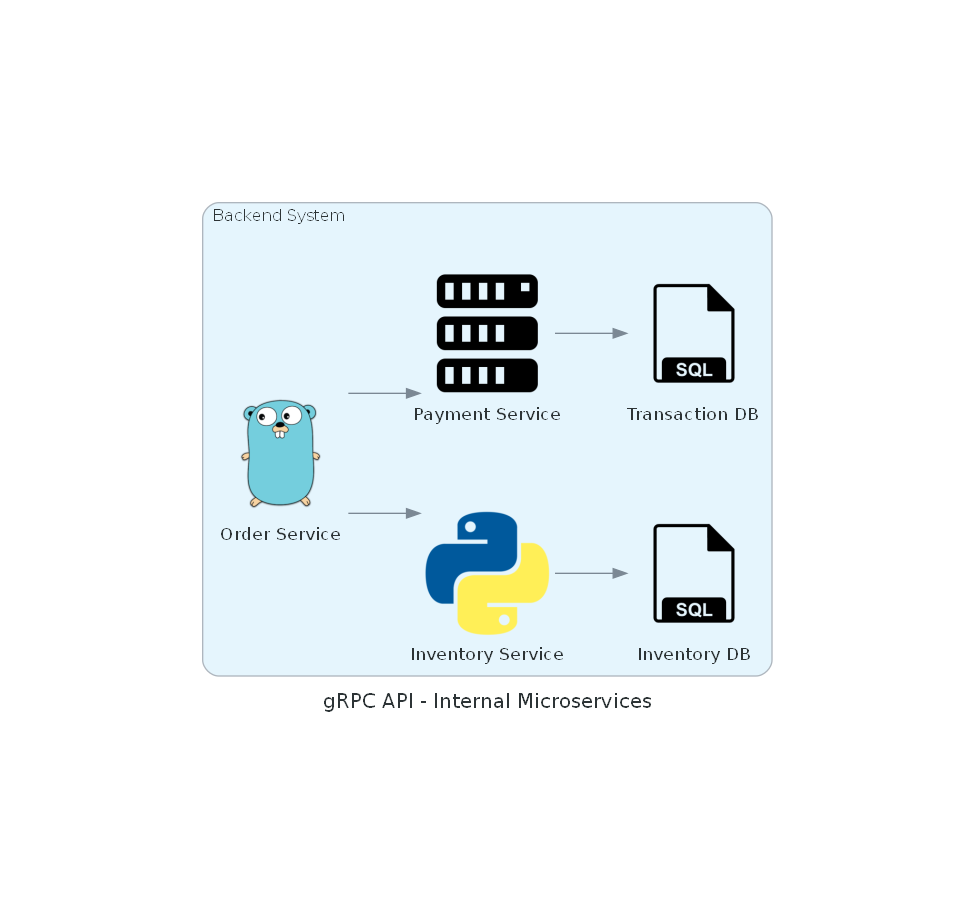

In [9]:
from diagrams import Diagram, Cluster
from diagrams.onprem.compute import Server
from diagrams.generic.database import SQL
from diagrams.programming.language import Go
from diagrams.programming.language import Python
from IPython.display import Image

with Diagram("gRPC API - Internal Microservices", show=False, filename="grpc_case", outformat="png"):
    with Cluster("Backend System"):
        order_service = Go("Order Service")
        inventory_service = Python("Inventory Service")
        payment_service = Server("Payment Service")

        order_service >> inventory_service
        order_service >> payment_service

        inventory_service >> SQL("Inventory DB")
        payment_service >> SQL("Transaction DB")

Image("grpc_case.png")
